Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2024./2025.  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2025 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **20. listopada 2024. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [32]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
poly = PolynomialFeatures(1)
phi = poly.fit_transform(x)
print(phi)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [33]:
from numpy import linalg
# Vaš kôd ovdje
in_bracket = phi.T @ phi
phi_plus = linalg.inv(in_bracket) @ phi.T
y = np.array([4,1,2,5])
w = np.dot(phi_plus, y)
print("a:", w)
print("b:",np.dot(linalg.pinv(phi), y))

a: [2.2        0.45714286]
b: [2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

[2.2        2.65714286 3.11428571 4.02857143]
2.042857142857143


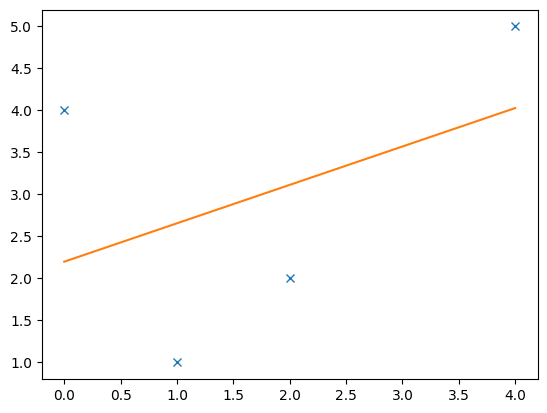

In [34]:
from sklearn.metrics import mean_squared_error
# Vaš kôd ovdje
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
h_x = np.dot(phi, w.T)
print(h_x)
pogreska = mean_squared_error(y, h_x)
print(pogreska)
plt.plot(X,y,'x',X,h_x)
plt.show()

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [36]:
#  Vaš kôd ovdje
try:
   np.dot(linalg.inv(phi),y)
except:
   print("error pri rješavanju sustava")
#print(phi)

error pri rješavanju sustava


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [37]:
from sklearn.linear_model import LinearRegression
# Vaš kôd ovdje
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
reg = LinearRegression().fit(phi, y)
w = [reg.intercept_, reg.coef_[1:]]
h_x = reg.predict(phi)
print(h_x)
nova_pogreska = mean_squared_error(y, h_x)
print("stara pogreska je ", pogreska)
print("nova pogreska je ", nova_pogreska)

[2.2        2.65714286 3.11428571 4.02857143]
stara pogreska je  2.042857142857143
nova pogreska je  2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [44]:
from numpy.random import normal
def make_labels(X, f, noise=0):
      return f(X) + normal(scale=noise, size=X.shape)


In [45]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [46]:
# Vaš kôd ovdje
funkcija = lambda x: (5 + x - 2* x**2 - 5 * x**3)
n = 50
X = make_instances(-5,5,n)
Y = make_labels(X, funkcija, 200)
print()

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

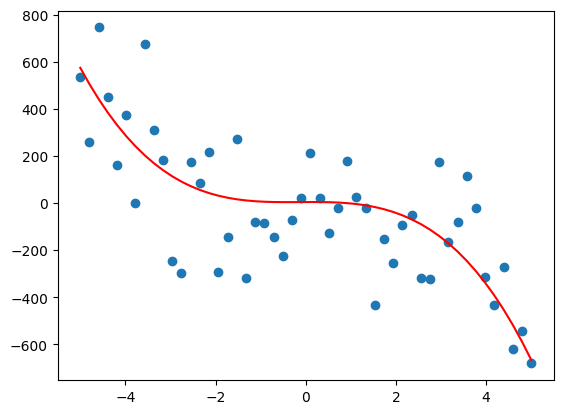

In [48]:
# Vaš kôd ovdje
plt.scatter(X,Y)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

37889.15477666261


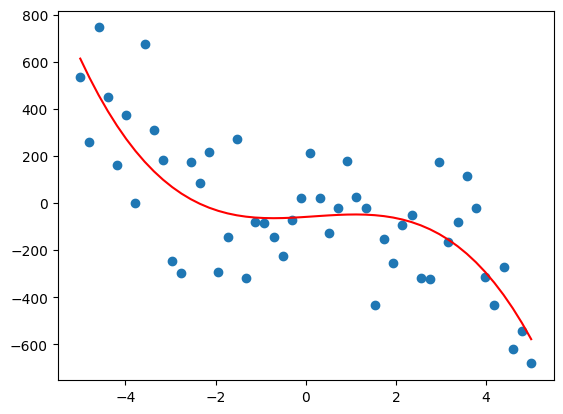

In [63]:
# Vaš kôd ovdje
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
phi_d3 = poly.fit_transform(X)
w_x_d3 = np.dot(np.linalg.pinv(phi_d3),Y)
h_x_d3 = np.dot(phi_d3,w_x_d3)

plt.plot(X, h_x_d3, 'r')
plt.scatter(X, Y)

pogreska_d3 = mean_squared_error(Y, h_x_d3)
print(pogreska_d3)

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

[49564.36051089393, 37889.15477666261, 36993.07607426926, 32381.519299321277, 22632.6021592402]


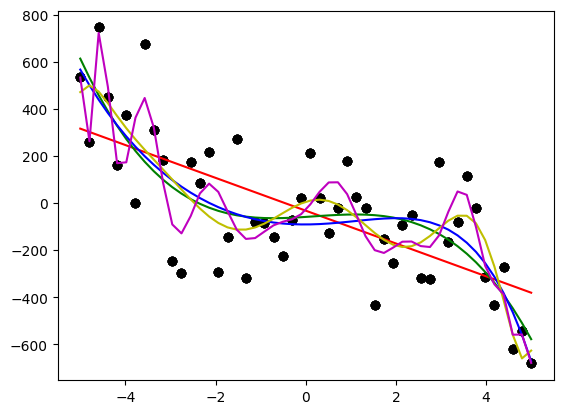

In [64]:
# Vaš kôd ovdje
from sklearn.preprocessing import PolynomialFeatures
stupnjevi = [1,3,5,10,20]
all_w = []
all_h = []
all_phi = []
pogreske = []
for i in range(len(stupnjevi)):
   poly = PolynomialFeatures(stupnjevi[i])
   all_phi.append(poly.fit_transform(X))
   all_w.append(np.dot(np.linalg.pinv(all_phi[i]),Y))
   all_h.append(np.dot(all_phi[i],all_w[i]))
   pogreske.append(mean_squared_error(Y, all_h[i]))
boje = ['r', 'g', 'b', 'y', 'm']
print(pogreske)
for i in range(len(stupnjevi)):
   plt.plot(X, all_h[i], boje[i])
   plt.scatter(X, Y, c="k")


### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

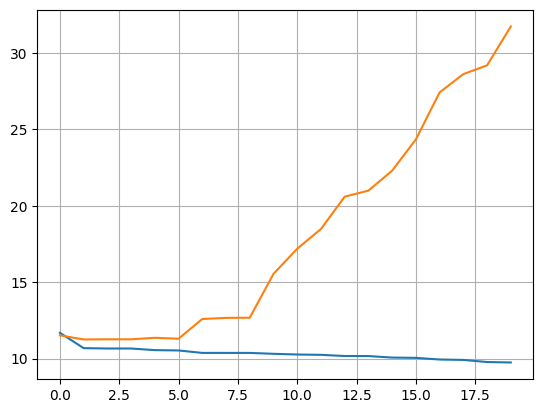

In [80]:
from sklearn.model_selection import train_test_split
# Vaš kôd ovdje
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.50)
#print("testx", X_test, "trainx: ", X_train, "ytest: ", Y_test, "trainY: ", Y_train)
pogreska_train = []
pogreska_test = []
stupnjevi = range(0,20)
for i in stupnjevi:
   phi_train = PolynomialFeatures(i).fit_transform(X_train)
   phi_test = PolynomialFeatures(i).fit_transform(X_test)
   w_tt = np.dot(np.linalg.pinv(phi_train),Y_train)
   h_train = np.dot(phi_train, w_tt)
   h_test =  np.dot(phi_test, w_tt)
   pogreska_train.append(np.log(mean_squared_error(Y_train,h_train)))
   pogreska_test.append(np.log(mean_squared_error(Y_test,h_test)))


plt.plot(stupnjevi, pogreska_train, stupnjevi, pogreska_test)
plt.grid()


### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

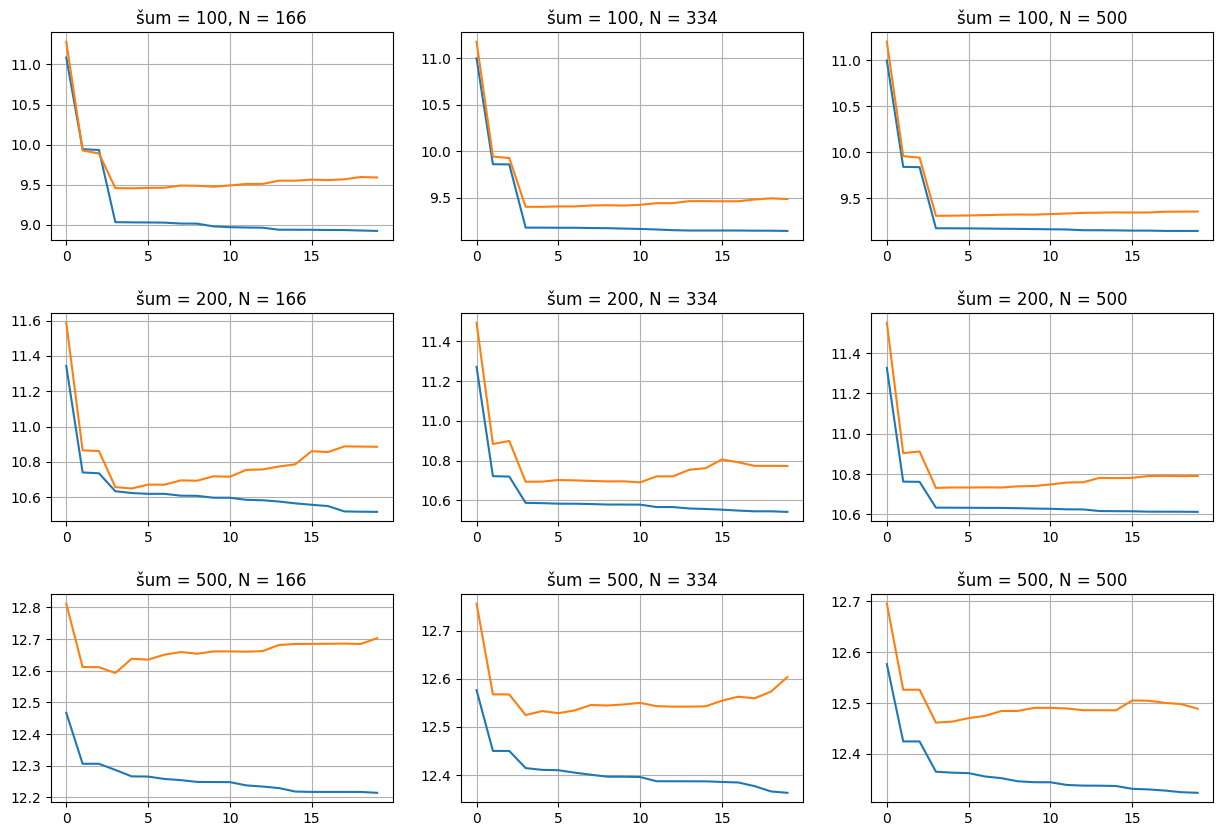

In [67]:
# Vaš kôd ovdje
n = 1000
N = [166, 334, 500]

sigma = [100,200,500]
X = make_instances(-5,5,n)
X_train, X_test = train_test_split(X, test_size=0.50)

all_X_train = []
all_X_test = []
all_Y_train = []
all_Y_test = []

for i in range(3):
   Y_train = make_labels(X_train, funkcija, sigma[i])
   Y_test = make_labels(X_test, funkcija, sigma[i])
   for j in range(3):
      all_X_train.append(X_train[0:N[j]])
      all_X_test.append(X_test[0:N[j]])
      all_Y_train.append(Y_train[0:N[j]])
      all_Y_test.append(Y_test[0:N[j]])

stupnjevi = range(0,20)

fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(wspace=0.2, hspace = 0.35) 

for i in range(9):
   pogreska_train = []
   pogreska_test = []
   for j in stupnjevi:
      phi_train = PolynomialFeatures(j).fit_transform(all_X_train[i])
      phi_test = PolynomialFeatures(j).fit_transform(all_X_test[i])
      w_tt = np.dot(np.linalg.pinv(phi_train),all_Y_train[i])
      h_train = np.dot(phi_train, w_tt)
      h_test =  np.dot(phi_test, w_tt)
      pogreska_train.append(np.log(mean_squared_error(all_Y_train[i],h_train)))
      pogreska_test.append(np.log(mean_squared_error(all_Y_test[i],h_test)))
   ax = fig.add_subplot(3, 3, i+1)
   plt.plot(stupnjevi, pogreska_train, stupnjevi, pogreska_test)
   plt.title("šum = " + str(sigma[i//3]) + ", N = " + str(N[i%3]))
   ax.grid()
      



***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [98]:
# Vaš kôd ovdje
x = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
I = np.array([[0,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]])
lambdas = [0,1,10]
phi = PolynomialFeatures(3).fit_transform(x)
#print(phi)
w_all = []
for i in range(3):
   in_bracket = phi.T @ phi + np.dot(lambdas[i],I)
   #print(in_bracket)
   phi_plus = linalg.inv(in_bracket) @ phi.T
   w_all.append(np.dot(phi_plus, y))
   print("w:", w_all[i])

w: [ 4.         -5.91666667  3.375      -0.45833333]
w: [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
w: [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [76]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje

for i in range(3):
   reg = Ridge(alpha=lambdas[i]).fit(phi, y)
   w = [reg.intercept_, reg.coef_[1:]]
   print(w)

[4.000000000000021, array([-5.91666667,  3.375     , -0.45833333])]
[3.0569614512471652, array([-0.69079365, -0.2831746 ,  0.1445805 ])]
[2.4944418431229725, array([-0.15897295, -0.13423067,  0.0815601 ])]


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

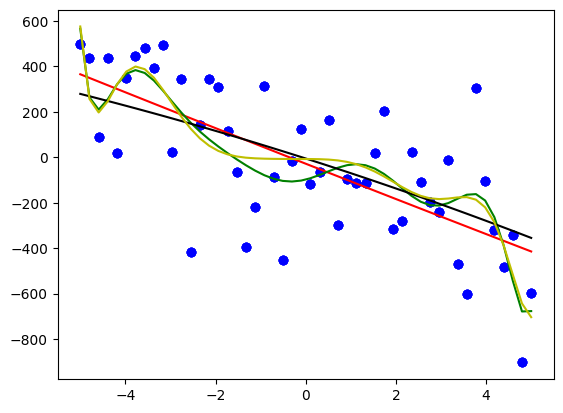

In [77]:
# Vaš kôd ovdje
n = 50
X = make_instances(-5,5,n)
Y = make_labels(X, funkcija, 200)
lambdas = [0, 100]
d = [2, 10]
I = np.array([[0,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]])
h_all = []
numbers = 0
boje = ['r', 'g', 'k', 'y']
for i in lambdas:
   for j in d:
      phi = PolynomialFeatures(j).fit_transform(X)
      in_bracket = phi.T @ phi + np.dot(i,np.eye(j+1))
      phi_plus = linalg.inv(in_bracket) @ phi.T
      w = np.dot(phi_plus, Y)
      h = (np.dot(phi, w))
      plt.plot(X, h, boje[numbers])
      plt.scatter(X, Y, c='b')
      numbers += 1


print()

### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


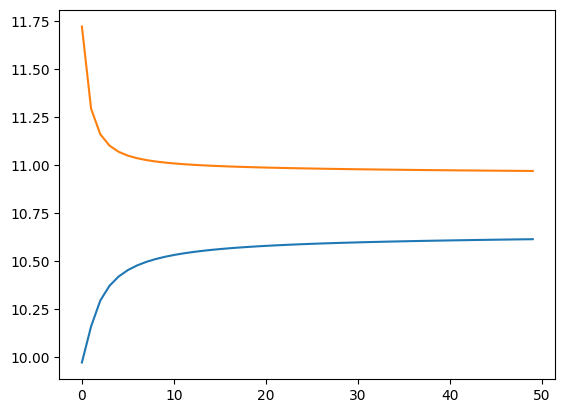

In [88]:
# Vaš kôd ovdje
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.50)
lambdas = range(0,50)
pogreska_train = []
pogreska_test = []
for i in lambdas:
   phi_train = PolynomialFeatures(10).fit_transform(X_train)
   phi_test = PolynomialFeatures(10).fit_transform(X_test)
   phi_plus_train = linalg.inv(phi_train.T @ phi_train + np.dot(i,np.eye(11))) @ phi_train.T
   phi_plus_test = linalg.inv(phi_test.T @ phi_test + np.dot(i,np.eye(11))) @ phi_test.T
   w_tt = np.dot(phi_plus_train, Y_train)
   h_train = (np.dot(phi_train, w_tt))
   h_test = (np.dot(phi_test, w_tt))
   pogreska_train.append(np.log(mean_squared_error(Y_train,h_train)))
   pogreska_test.append(np.log(mean_squared_error(Y_test,h_test)))
plt.plot(lambdas, pogreska_train, lambdas, pogreska_test)


### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [20]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

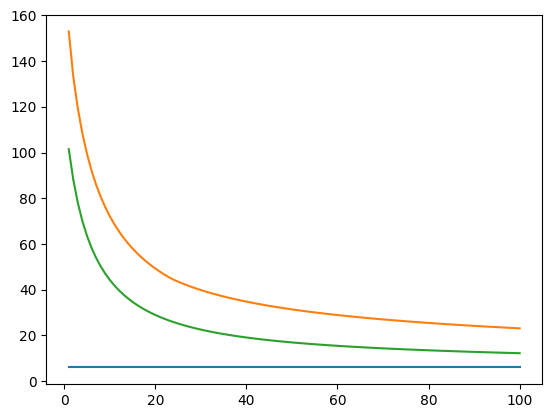

In [95]:
from sklearn.linear_model import Ridge
import math
# Vaš kôd ovdje
X = make_instances(-5,5,n)
Y = make_labels(X, funkcija, 200)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.50)
lambdas = range(1,101)
phi = PolynomialFeatures(5).fit_transform(X_train)
L_nula = []
L_jedan = []
L_dva = []

for i in lambdas:
   phi_plus_train = linalg.inv(phi.T @ phi + np.dot(i,np.eye(6))) @ phi.T
   w = np.dot(phi_plus_train, Y_train)
   L_nula.append(nonzeroes(w))
   L_jedan.append(sum(abs(w)))
   L_dva.append(math.sqrt(np.dot(w.T, w)))

plt.plot(lambdas, L_nula, lambdas, L_jedan, lambdas, L_dva)


### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

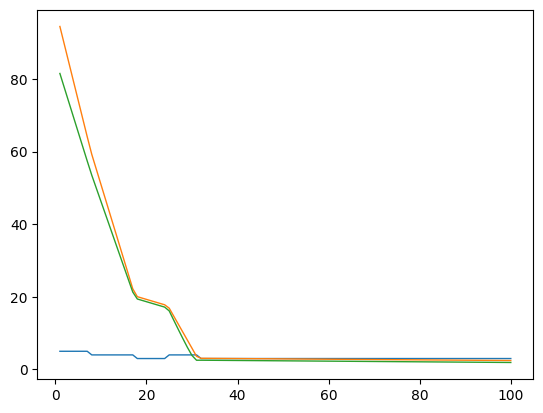

In [96]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje
L_nula = []
L_jedan = []
L_dva = []
lambdas = range(1,101)
for i in lambdas:
   lasso = Lasso(alpha=i, fit_intercept=True, max_iter=10000).fit(phi, Y_train)
   w = lasso.coef_
   L_nula.append(nonzeroes(w))
   L_jedan.append(sum(abs(w)))
   L_dva.append(math.sqrt(np.dot(w.T, w)))

plt.plot(lambdas, L_nula, lambdas, L_jedan, lambdas, L_dva, linewidth=1)
print()

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [23]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

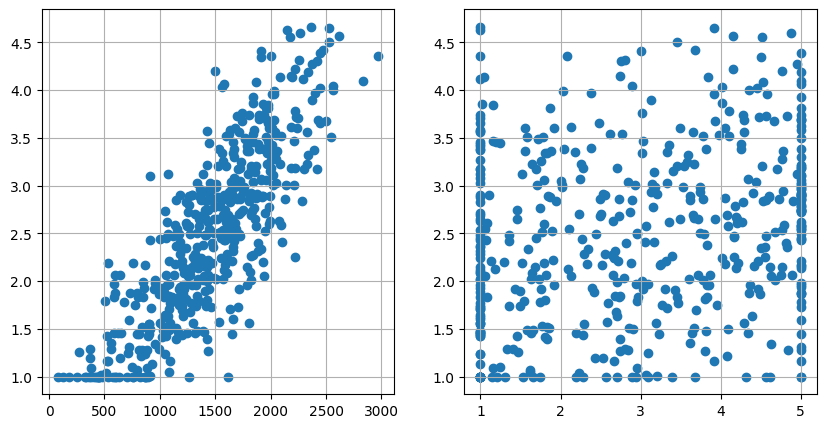

In [24]:
# Vaš kôd ovdje
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
plt.scatter(exam_score, grades_y)
ax.grid()
ax = fig.add_subplot(1, 2, 2)
plt.scatter(grade_in_highschool, grades_y)
ax.grid()

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [25]:
# Vaš kôd ovdje
lambda6 = 0.01
reg = Ridge(alpha=lambda6).fit(grades_X, grades_y)
print(reg.intercept_, reg.coef_)

0.15061179575775974 [0.00141497 0.09477276]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [26]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje
scalerx = StandardScaler()
scalerx.fit(grades_X)
grades_X_fixed = scalerx.transform(grades_X)
scalery = StandardScaler()
scalery.fit(grades_y.reshape(-1,1))
grades_y_fixed = scalery.transform(grades_y.reshape(-1,1))

lambda6 = 0.01
reg = Ridge(alpha=lambda6).fit(grades_X_fixed, grades_y_fixed)
print(reg.intercept_, reg.coef_)

[8.62551331e-17] [[0.81630375 0.15167761]]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [27]:
# Vaš kôd ovdje
new_column = grades_X_fixed[:, -1].reshape(-1, 1)
grades_X_fixed_colinear = np.concatenate((grades_X_fixed, new_column), axis=1)
print(grades_X_fixed_colinear)

[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [28]:
# Vaš kôd ovdje
lambda6 = 0.01
reg = Ridge(alpha=lambda6).fit(grades_X_fixed_colinear, grades_y_fixed)
print(reg.intercept_, reg.coef_)

[8.6255971e-17] [[0.81630364 0.07583957 0.07583957]]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [29]:
# Vaš kôd ovdje
lambdas = [0.01, 1000]
prvi_model = []
drugi_model = []
for i in range(10):
   X_prvi, X_drugi, Y_prvi, Y_drugi = train_test_split(grades_X_fixed_colinear,grades_y_fixed, train_size=0.50)
   reg1 = Ridge(alpha=lambdas[0])
   reg2 = Ridge(alpha=lambdas[1])
   reg1.fit(X_prvi, Y_prvi)
   reg2.fit(X_drugi, Y_drugi)
   prvi_model.append(reg1.coef_)
   drugi_model.append(reg2.coef_)

prvi_model = np.array(prvi_model)
print("prvi model: ", prvi_model)
drugi_model = np.array(drugi_model)
print("\ndrugi model: ", drugi_model)
std_prvi = np.std(prvi_model, axis=0)
print("\nstddev1: ", std_prvi)
std_drugi = np.std(drugi_model, axis=0)
print("\nstddev2: ", std_drugi)

prvi model:  [[[0.79385128 0.06504303 0.06504303]]

 [[0.80739011 0.0761075  0.0761075 ]]

 [[0.814158   0.07673386 0.07673386]]

 [[0.83265053 0.07483515 0.07483515]]

 [[0.79735626 0.08013669 0.08013669]]

 [[0.81845427 0.04525193 0.04525193]]

 [[0.80086373 0.0614553  0.0614553 ]]

 [[0.81216485 0.06648337 0.06648337]]

 [[0.81501911 0.04444567 0.04444567]]

 [[0.81925961 0.07443972 0.07443972]]]

drugi model:  [[[0.16419725 0.02816756 0.02816756]]

 [[0.16837778 0.04200572 0.04200572]]

 [[0.16675609 0.03992155 0.03992155]]

 [[0.16232085 0.03253696 0.03253696]]

 [[0.17099764 0.03987356 0.03987356]]

 [[0.15003014 0.03454006 0.03454006]]

 [[0.17269709 0.04318487 0.04318487]]

 [[0.1670921  0.0357689  0.0357689 ]]

 [[0.16044761 0.05071806 0.05071806]]

 [[0.16131422 0.03525785 0.03525785]]]

stddev1:  [[0.01102672 0.01216945 0.01216945]]

stddev2:  [[0.00613993 0.00602063 0.00602063]]


**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.